<center> <h1> 重要技巧：DataAugumentation </h1> </center>


# 数据存储结构

In [1]:
%ls ./data/CatDog              # 数据生成器的基本前提条件；根目录
%ls ./data/CatDog/validation/    # 验证集
%ls ./data/CatDog/train/        # 训练集

train/  validation/
cats/  dogs/
cats/  dogs/


# 数据生成器：Validation

In [2]:
from keras.preprocessing.image import ImageDataGenerator  # 图片预处理
IMSIZE=128    # 图片像素

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './data/CatDog/validation',     # 数据路径
    target_size=(IMSIZE, IMSIZE),    # 数据像素（目标大小）
    batch_size=200,               # 批处理大小
    class_mode='categorical')    # 生成验证数据集

Using TensorFlow backend.


Found 10000 images belonging to 2 classes.


# 数据生成器：Train

In [3]:
train_generator = ImageDataGenerator(
    rescale=1./255,     # 像素取值变为0-1之间
    shear_range=0.5,    # 一定角度下的斜方向拉伸强度不超过0.5
    rotation_range=30,   # 图片右旋转不超过30°
    zoom_range=0.2,      # 定义放大或缩小比例不超多0.2
    width_shift_range=0.2,   # 水平方向上平移不超过0.2的宽度
    height_shift_range=0.2,   # 垂直方向的平移不超过0.2的高度
    horizontal_flip=True).flow_from_directory(     # 允许水平和竖直方向的翻转
    './data/CatDog/train',          # 数据路径
    target_size=(IMSIZE, IMSIZE),   # 数据像素（目标大小）
    batch_size=200,                 # 批处理大小
    class_mode='categorical')         # 生成训练数据集

Found 15000 images belonging to 2 classes.


# 训练数据：展示

<Figure size 432x288 with 0 Axes>

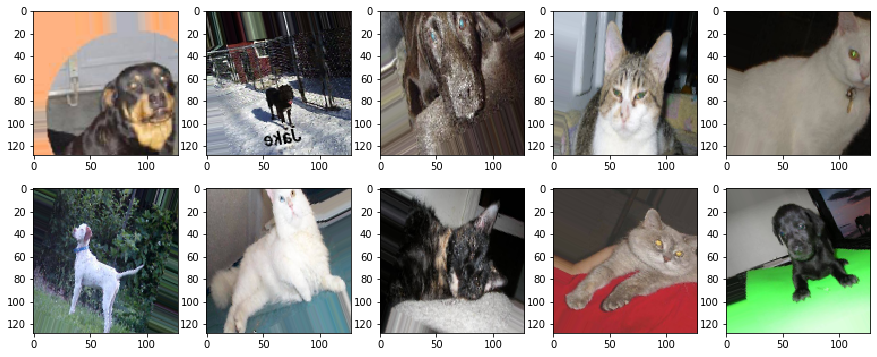

In [4]:
from matplotlib import pyplot as plt   # 导入画板

plt.figure()    # 创建画板
fig,ax = plt.subplots(2,5)   # 将面板切分成2行5列
fig.set_figheight(6)       # 高为6
fig.set_figwidth(15)       # 宽为15
ax=ax.flatten()            # 拉直
X,Y=next(train_generator)     # 分批吐出数据
for i in range(10): ax[i].imshow(X[i,:,:,:])   # 展示

# 多层神经网络模型

In [5]:
IMSIZE=128      # 图片像素
from keras.layers import BatchNormalization,Conv2D,Dense,Flatten,Input,MaxPooling2D
 # 导入各种层函数
from keras import Model   # 模型

n_channel=100   # 设置100个卷积核
input_layer=Input([IMSIZE,IMSIZE,3])  # 定义一个通道为3的128*128的彩色图片
x=input_layer       # 赋值
x=BatchNormalization()(x)     # 训练数据集
for _ in range(7):     
    x=BatchNormalization()(x)   # 7层Batch
    x=Conv2D(n_channel,[2,2],padding='same',activation='relu')(x)  # 7层卷积
    x=MaxPooling2D([2,2])(x)    # 7层最大池化

x=Flatten()(x)    # 拉直
x=Dense(2,activation='softmax')(x)    # 输出2个节点
output_layer=x       # 输出
model=Model(input_layer,output_layer)   # 基于以上，构建模型
model.summary()    # 模型结构

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 100)     1300      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 100)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 100)       400       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 100)       4010

以上模型参数清点：

输⼊层: 输⼊的是128*128像素的3通道的图⽚, 不消耗任何参数.

batch_normalization_1 层：每一层消耗4个参数，一共3层，共消耗12个参数.

batch_normalization_2 层：每一层消耗4个参数，一共3层，共消耗12个参数.

batch_normalization_3 层：每一层消耗4个参数，一共100层，共消耗400个参数.

batch_normalization_4 层：每一层消耗4个参数，一共100层，共消耗400个参数.

batch_normalization_5 层：每一层消耗4个参数，一共100层，共消耗400个参数.

batch_normalization_6 层：每一层消耗4个参数，一共100层，共消耗400个参数.

batch_normalization_7 层：每一层消耗4个参数，一共100层，共消耗400个参数.

batch_normalization_8 层：每一层消耗4个参数，一共100层，共消耗400个参数.

7层卷积层：输入100通道的分别为128x128,64x64,32x32,16x16，8x8，4x4，2x2，1x1像素，共消耗1300+40100x6=241900个参数.

7层最大池化层：1*1像素100通道的立体矩阵，不消化任何参数.

flatten_2 层：将其拉直成100，不消化任何参数.

dense_2 层：做一个2节点的全连接输出，消耗202个参数.

合计: 共消耗了: 244526个参数, 其中需要训练的参数个数为:243314，不需要训练的参数个数为：1212.

# 模型训练与验证

In [ ]:
from keras.optimizers import Adam    # 导⼊优化器Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
#模型编译，损失函数为交叉熵；优化器为Adam；学习速率为0.01 ；衡量指标为精度
model.fit_generator(train_generator,epochs=2,validation_data=validation_generator)
# 训练10轮；模型训练，⽤训练集

Epoch 1/2
75/75 [==============================] - 313s 4s/step - loss: 0.7091 - accuracy: 0.6075 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 2/2
68/75 [==========================>...] - ETA: 16s - loss: 0.6153 - accuracy: 0.6625

# 思考问题：如果不做数据加强？